In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2,linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets
data_path = '../data_unversioned/p1ch7'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data_unversioned/p1ch7/cifar-10-python.tar.gz to ../data_unversioned/p1ch7


In [3]:
cifar10_val = datasets.CIFAR10(data_path,train=False,download=True)#train =True时加载训练集，False 时加载测试集

Files already downloaded and verified


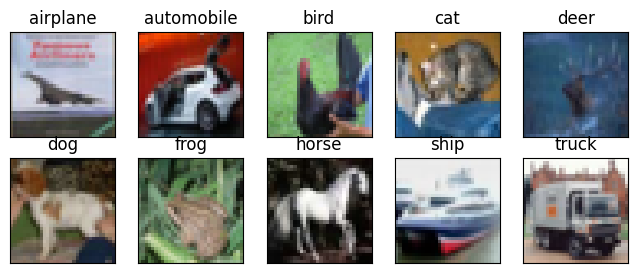

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_class = 10
for i in range(num_class):
    ax = fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img , label in cifar10_val if label ==i)
    plt.imshow(img)
plt.show()

In [6]:
type(cifar10).__mro__#"MRO" 是 Method Resolution Order 的缩写。type(cifar10).__mro__ 表达式将返回一个元组，其中包含了 cifar10 对象所属类及其父类的顺序，按照 MRO 的算法确定

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [7]:
len(cifar10),len(cifar10_val)

(50000, 10000)

In [14]:
img,label =cifar10[66] #数据集每个索引取出一个元祖（img,label）包含一个图片和标签

img,label ,class_names[label],type(cifar10[66])

(<PIL.Image.Image image mode=RGB size=32x32>, 4, 'deer', tuple)

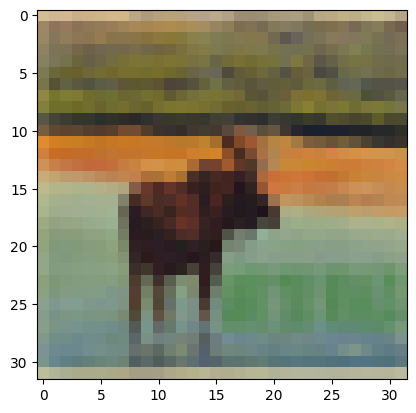

In [10]:
plt.imshow(img)
plt.show()

In [15]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [16]:
from torchvision import transforms
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [17]:
tensor_cifar10 = datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.ToTensor())

In [20]:
img_t,_ = tensor_cifar10[99]
type(img_t),img_t.min(),img_t.max()

(torch.Tensor, tensor(0.), tensor(1.))

TypeError: Invalid shape (3, 32, 32) for image data

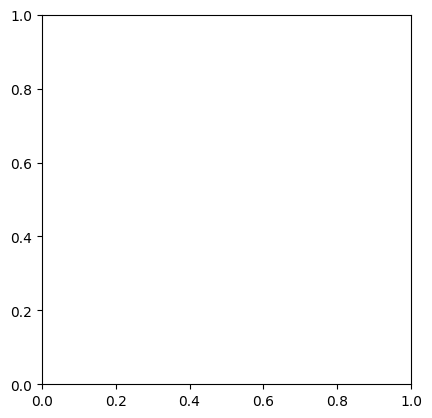

In [21]:
plt.imshow(img_t) #permute 置换，重排，不置换通道不能显示
plt.show()

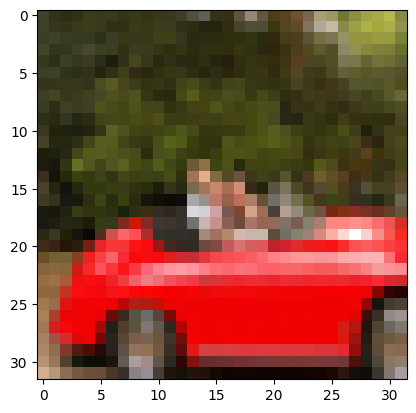

In [22]:
plt.imshow(img_t.permute(1,2,0))  #permute 置换，重排，指定参数1, 2, 0，我们告诉函数将原始张量的第一个维度变为新张量的第二个维度，第二个维度变为第三个维度，第三个维度变为第一个维度
plt.show()

In [24]:
imgs = torch.stack([img_t for img_t,_ in tensor_cifar10],dim=3)
len([img_t for img_t, _ in tensor_cifar10]),imgs.shape

(50000, torch.Size([3, 32, 32, 50000]))

In [26]:
imgs_for_mean = imgs.view(3,-1)#将原来[3, 32, 32, 50000]的尺寸改成【3，-1】
# imgs_for_mean.shape
imgs_for_mean.mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [27]:
imgs_for_mean.std(dim =1)#.std 对维度1进行标准差计算

tensor([0.2470, 0.2435, 0.2616])

In [28]:
transforms_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                      transform=transforms.Compose(
                                          [transforms.ToTensor(),
                                           transforms.Normalize([0.4914, 0.4822, 0.4465],[0.2470, 0.2435, 0.2616])]
                                      ))

In [29]:
transforms_cifar10_val = datasets.CIFAR10(
    data_path,train=True,download=False,
    transform=transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465],
                             [0.2470, 0.2435, 0.2616])]
    )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


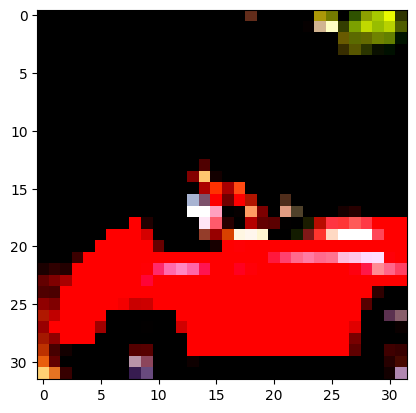

In [30]:
img_t,_ = transforms_cifar10[99]

plt.imshow(img_t.permute(1,2,0))
plt.show()